In [ ]:
import numpy as np
import GCRCatalogs
import healpy
import clmm
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from astropy.table import QTable, Table, vstack, join, hstack
import pickle,sys
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import edit
sys.path.append('/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/data_extraction')
from clmm import Cosmology
from scipy.integrate import simps

#cosmoDC2 cosmology
cosmo = Cosmology(H0 = 71.0, Omega_dm0 = 0.265 - 0.0448, Omega_b0 = 0.0448, Omega_k0 = 0.0)

lens_catalog_name='/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/lens_catalog_SkySim5000.pkl'

lens_catalog=edit.load_pickle(lens_catalog_name)

In [126]:
mask = np.log10(lens_catalog['baseDC2/sod_halo_mass']/cosmo['h']) > 13.9

/pbs/home/c/cpayerne/.conda/envs/mydesc/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [127]:
lens_catalog.colnames

['dec',
 'ra',
 'baseDC2/sod_halo_radius',
 'halo_id',
 'halo_mass',
 'baseDC2/sod_halo_mass',
 'redshift']

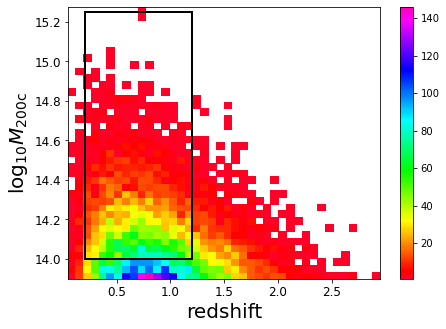

In [128]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
h=ax.hist2d(lens_catalog['redshift'][mask], np.log10(lens_catalog['baseDC2/sod_halo_mass'][mask]/cosmo['h']), bins=40, cmap='gist_rainbow', cmin=1)
fig.colorbar(h[3], ax=ax)
rect = patches.Rectangle((.2, 14), 1,1.25, linewidth=2, edgecolor='k', facecolor='none', alpha=1)
ax.add_patch(rect)
ax.tick_params(axis='both', which = 'major', labelsize= 12)
plt.xlabel('redshift', fontsize=20)
plt.ylabel(r'$\log_{10}M_{\rm 200c}$', fontsize=20)
plt.show()

In [122]:
mask_count = (np.log10(lens_catalog['baseDC2/sod_halo_mass']/cosmo['h']) > 14)*(lens_catalog['redshift'] > .2)*(lens_catalog['redshift'] < 1.2)

/pbs/home/c/cpayerne/.conda/envs/mydesc/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [124]:
len(mask_count[mask_count==True])

5613